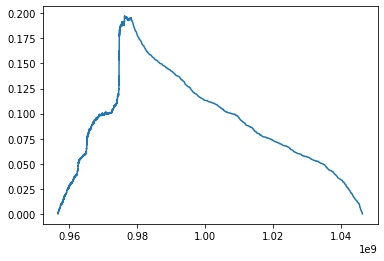

In [2]:
from collections import defaultdict
import matplotlib.pyplot as plt

import pandas as pd

DS = "ml-1m"

df = pd.read_csv(
    f"../../data/{DS}/ratings.dat",
    engine='python',
    sep="::",
    names=["uid", "iid", "rating", "ts"],
    header = None)

# u_id -> (min_ts, max_ts)
min_max_ts = defaultdict(lambda: (float('inf'), -1))


df = df.reset_index()
for _, row in df.iterrows():
    uid, ts = row['uid'], int(row['ts'])
    uid_min = min(min_max_ts[uid][0], ts)
    uid_max = max(min_max_ts[uid][1], ts)
    min_max_ts[uid] = (uid_min, uid_max)

counter = [(x[0], 1) for x in min_max_ts.values()] 
counter += [(x[1], -1) for x in min_max_ts.values()]
counter.sort()

cnt = 0
x = []
y = []
for (ts, i) in counter:
    cnt += i
    x.append(ts)
    y.append(cnt/6040)

plt.plot(x, y)
    

In [3]:
## Como visto, distribuição bem desigual no tempo.

In [41]:
## Transforma csv em urm (sparse matrix)

import pickle
from scipy.sparse import csr_matrix

# DS = "ml-100k"
# U = 943
# I = 1682

# DS = "ml-1m"
# U = 6040
# I = 3952

DS = "ml-10m"
U = 71567
I = 65126

df = pd.read_csv(
    f"TS-split/{DS}/train.csv",
    engine='python',
    sep=", ")

array = df.to_records(index=False)

# print(f"max_rating: {max(array['rating'])}, min_rating:{min(array['rating'])}")
# print(f"max_uid: {max(array['uid'])}, min_uid:{min(array['uid'])}")
# print(f"max_iid: {max(array['iid'])}, min_iid:{min(array['iid'])}")
# print(f"num_iid: {len(set(array['iid']))}")

urm = csr_matrix((array['rating'].astype(int),
                  (array['uid'].astype(int), array['iid'].astype(int))),
                 shape=(U+1, I+1))

pickle.dump(urm, open(f"TS-split/{DS}/train_urm.pk", "wb" ), pickle.HIGHEST_PROTOCOL)